# 2-1 燃弧相角分析

In [1]:
import re
import os
import time
import csv
import math
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import myUtils

In [2]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
root_data_path = '../data/'
feature_path = root_data_path + '2_features/'
src_data_path = root_data_path + '1_processed_data/2_smoothed_data/'
operation_stage = 'arcing'
operation_ftr_path = feature_path + operation_stage + '/'
machine_files = os.listdir(operation_ftr_path)
print(machine_files)

['1.csv', '10.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv']


In [4]:
machine_ftr_dict_file = feature_path + 'machine_ftr_dict.pkl'
if os.path.exists(machine_ftr_dict_file):
    machine_ftr_dict = myUtils.loadPickleFile(machine_ftr_dict_file)
    print('machine_ftr_dict_file is loaded')
else:
    machine_ftr_dict = {}
    for i, tmp_file in enumerate(machine_files):
        machine_id = re.match('(.*).csv', tmp_file).group(1)
        machine_ftr_dict[machine_id] = pd.read_csv(operation_ftr_path + tmp_file)
    myUtils.dumpPickleFile(machine_ftr_dict, machine_ftr_dict_file)
    print('machine_ftr_dict_file is created')

machine_ftr_dict_file is created


In [5]:
en_col = ['energy','duration']
cn_col = ['能量','时长']

In [9]:
machine_id = '1'
operation_data_list = myUtils.loadPickleFile(src_data_path + machine_id + '.pkl')

In [10]:
phase_angle_degree_range = list(range(0, 361, 30))
phase_angle_degree_range

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]

### 不同燃弧相角区间内，A相在燃弧时段的电压波形(10度)

../data/2_features/燃弧相角划分_间隔10度/燃弧电压波形/ already exist.


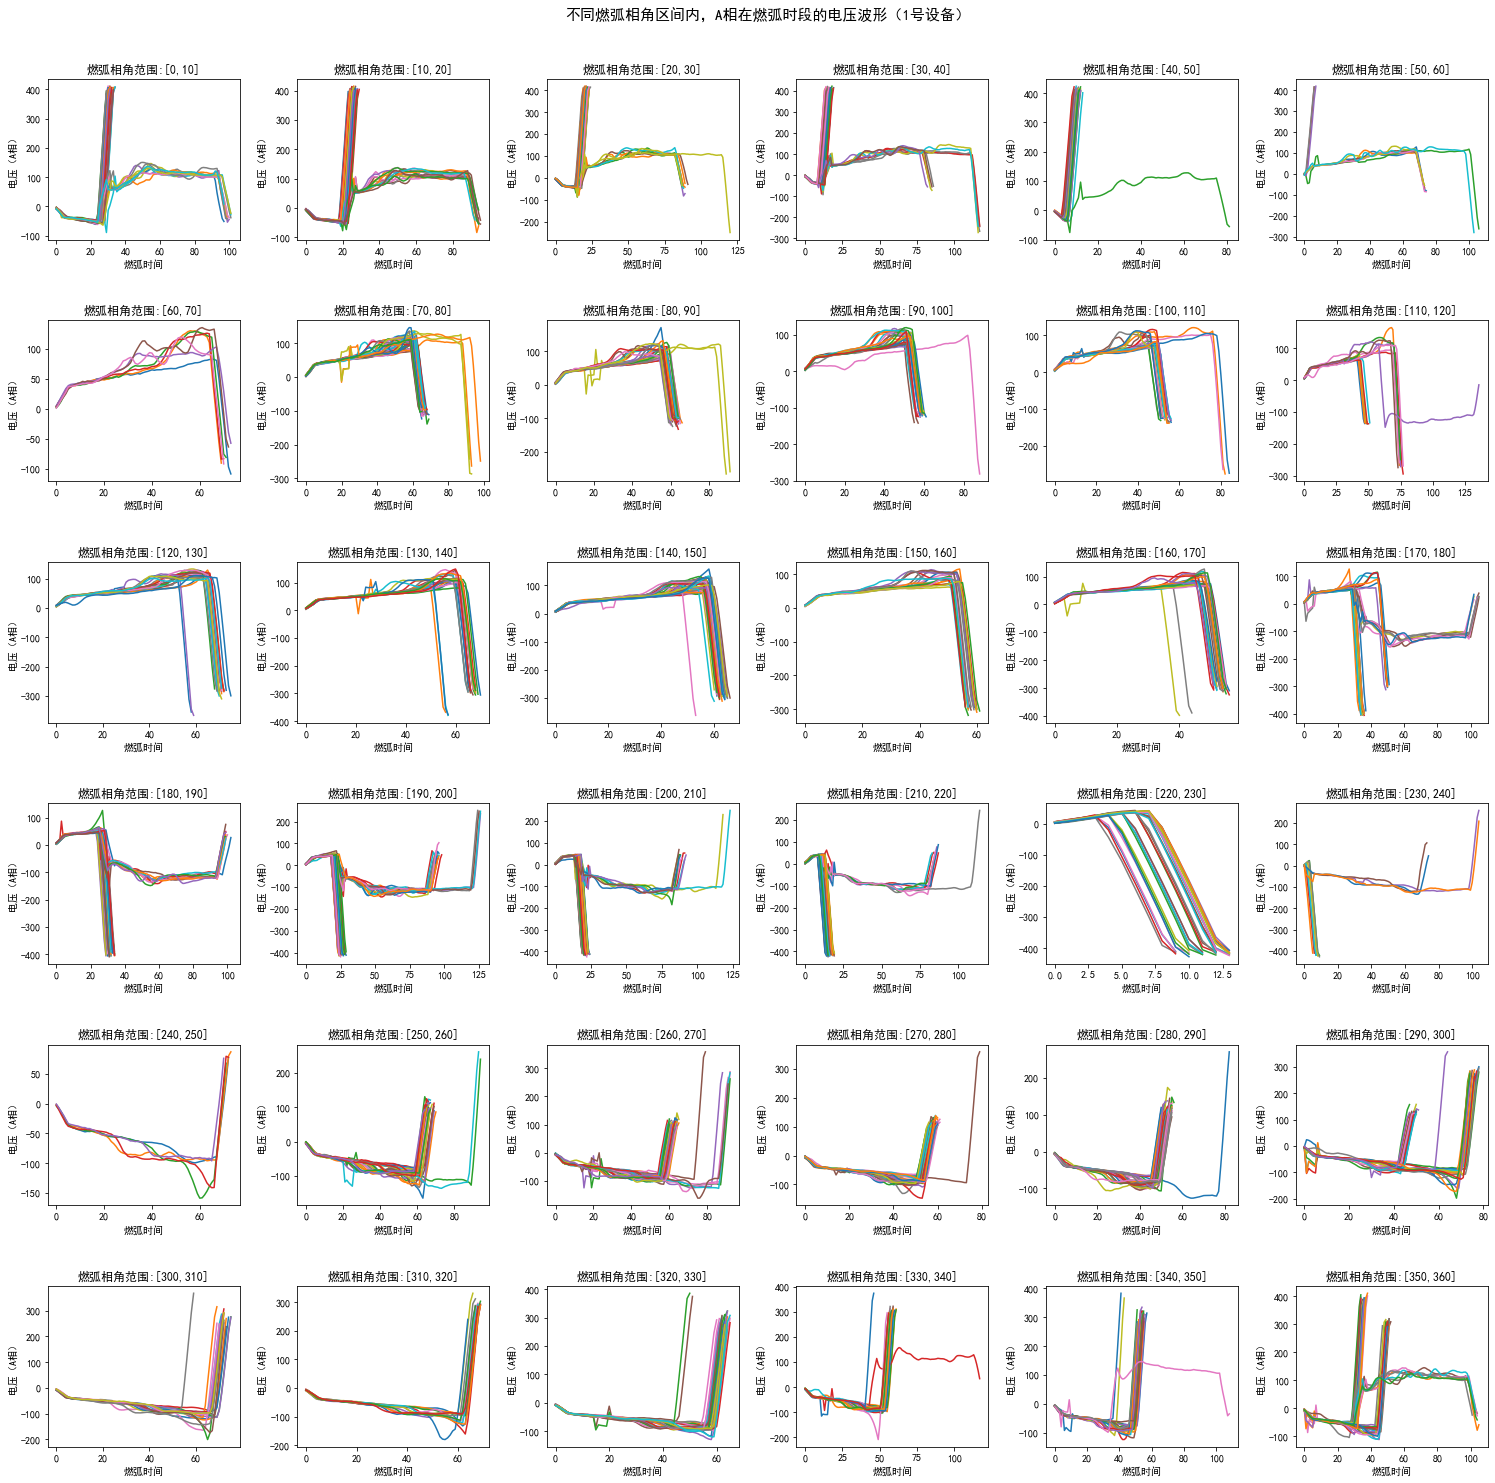

In [11]:
phase_angle_degree_gap = 10
fig_path = feature_path + '燃弧相角划分_间隔'+str(phase_angle_degree_gap)+'度/燃弧电压波形/'
myUtils.makedirs(fig_path)
for machine_id in ['1']:#machine_ids:
    machine_ftr_df = machine_ftr_dict[machine_id]
    operation_data_list = myUtils.loadPickleFile(src_data_path + machine_id + '.pkl')
    #fig = plt.figure(figsize=(10,70))
    fig = plt.figure(figsize=(20,20))
    plt.subplots_adjust(top=0.95,bottom=0,left=0,right=1,hspace=0.5,wspace=0.3)
    #解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    title = '不同燃弧相角区间内，A相在燃弧时段的电压波形（'+ machine_id +'号设备）'
    fig.suptitle(title,fontsize=15,y=1)
    for range_idx, degree_start in enumerate(range(0, 360, phase_angle_degree_gap)):
        #plt.subplot(int(360/phase_angle_degree_gap),3,range_idx+ 1)
        plt.subplot(6,6, range_idx+ 1)
        degree_end = phase_angle_degree_gap + degree_start
        tmp_df = machine_ftr_df[(machine_ftr_df['A_phase_angle_degree'] >= degree_start) & (machine_ftr_df['A_phase_angle_degree'] <= degree_end)]
       
        for idx in tmp_df.index:
            #print(idx)
            arcing_start = int(tmp_df.loc[idx]['A_arcing_start'])
            arcing_end = int(tmp_df.loc[idx]['A_arcing_end']) + 1
            plt.plot(operation_data_list[idx]['UA'][arcing_start: arcing_end].tolist())
            plt.title('燃弧相角范围:[' + str(degree_start) +','+ str(degree_end)+']')
            plt.xlabel('燃弧时间')
            plt.ylabel('电压（A相）')
    
    #fig.savefig(fig_path + title + '.png', dpi=100, bbox_inches ='tight')
    #plt.close(fig)
    #break

#### 不同燃弧相角区间内，每个设备的燃弧时长/能量与操作次数的关系

../data/2_features/燃弧相角划分_间隔10度/燃弧时长/ already exist.


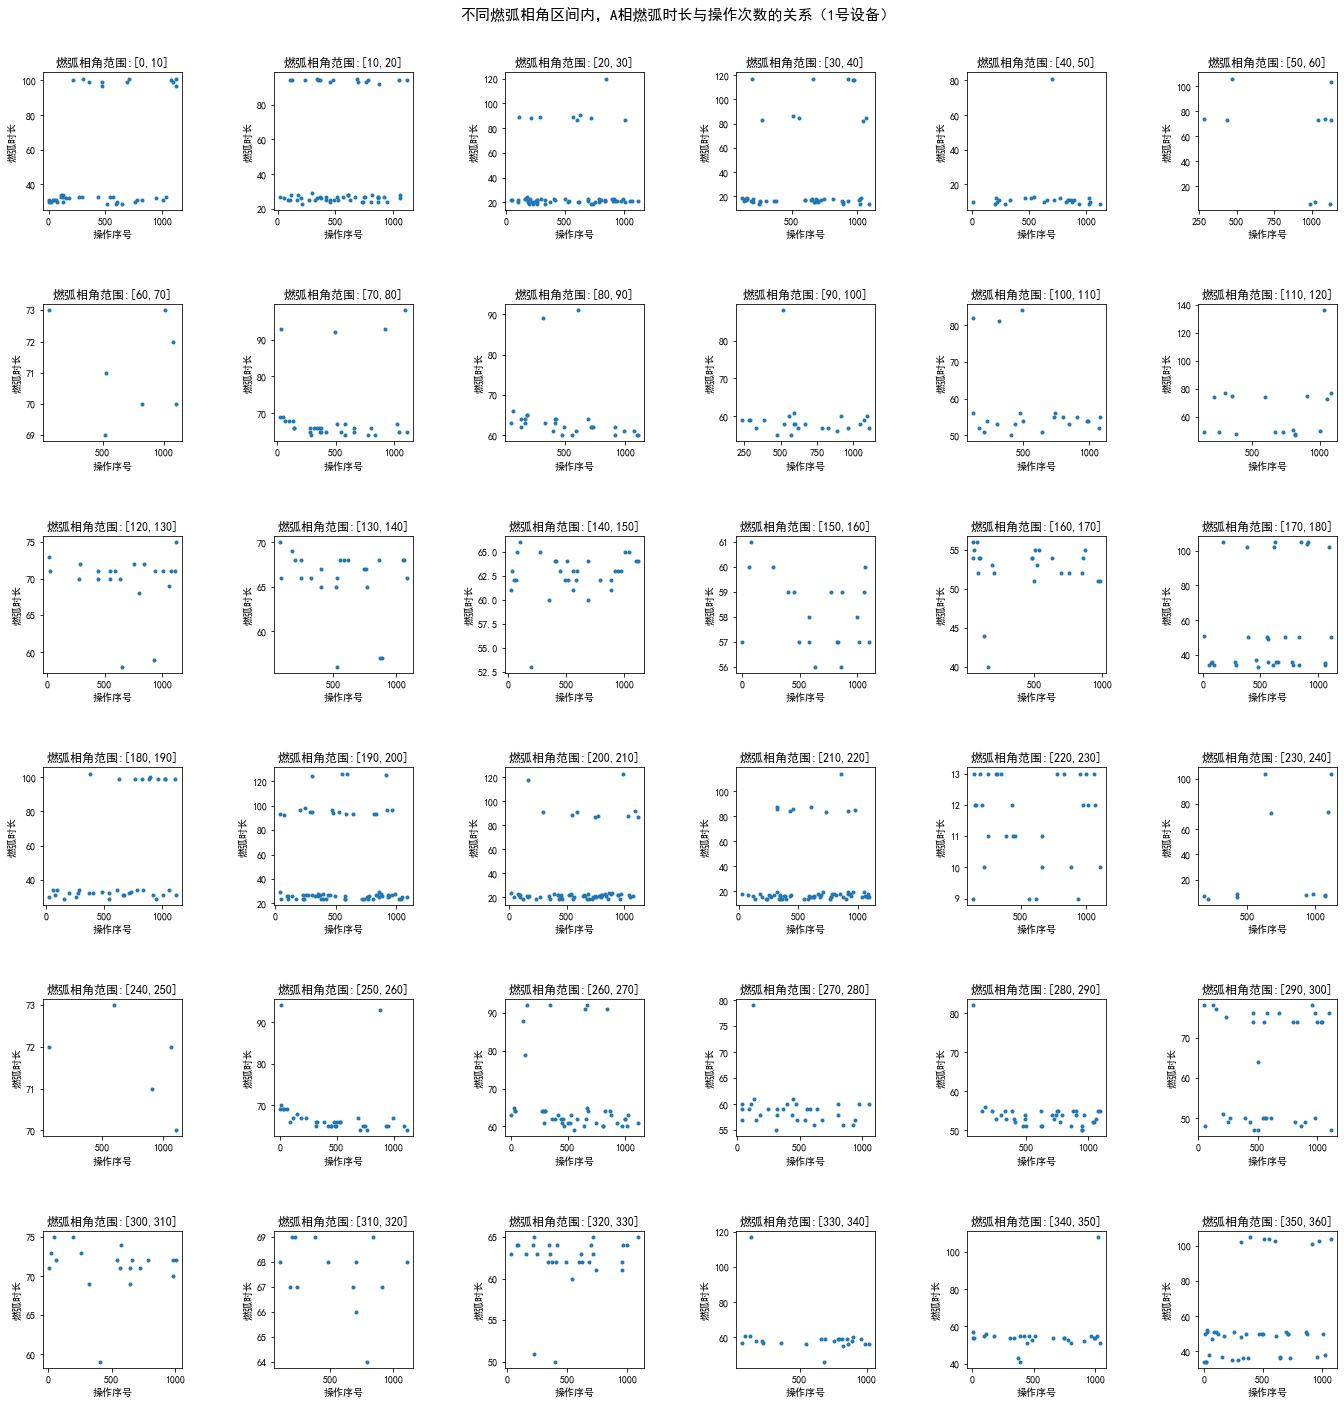

In [14]:

idx_col = 1
phase_angle_degree_gap = 10
fig_path = feature_path + '燃弧相角划分_间隔'+str(phase_angle_degree_gap)+'度/燃弧' + cn_col[idx_col] +'/'
myUtils.makedirs(fig_path)
for machine_id in ['1']:#machine_ids:#
    machine_ftr_df = machine_ftr_dict[machine_id]
    machine_ftr_df['machine_id'] = machine_id
    machine_ftr_df['operation_times'] = machine_ftr_df.index
    
    fig = plt.figure(figsize=(20,20))
    plt.subplots_adjust(top=0.95,bottom=0,left=0,right=1,hspace=0.5,wspace=0.3)
    
    title = '不同燃弧相角区间内，A相燃弧' + cn_col[idx_col] +'与操作次数的关系（'+ str(machine_id) +'号设备）'
    fig.suptitle(title,fontsize=15,y=1)
    #plt.subplots_adjust(hspace=0.5,wspace=0.2)
    #解决中文显示问题
    
    y_max = max(machine_ftr_df['A_arcing_' + en_col[idx_col]])
    for range_idx, degree_start in enumerate(range(0, 360, phase_angle_degree_gap)):
        plt.subplot(6, 6, range_idx+ 1)
        plt.tight_layout(pad=5) 
        degree_end = phase_angle_degree_gap + degree_start
        tmp_df = machine_ftr_df[(machine_ftr_df['A_phase_angle_degree'] >= degree_start) & (machine_ftr_df['A_phase_angle_degree'] <= degree_end)]
        plt.plot(tmp_df['operation_times'], tmp_df['A_arcing_' + en_col[idx_col]],'.')
        plt.title('燃弧相角范围:[' + str(degree_start) +','+ str(degree_end)+']')
        plt.xlabel('操作序号')
        plt.ylabel('燃弧'+ cn_col[idx_col])
        # plt.ylim([0,2000000])
    #fig.savefig(fig_path + title+ '.png', dpi=100,bbox_inches ='tight')
    #plt.close(fig)
    

#### 不同燃弧相角区间内，A相在燃弧时段的电压波形(30度)

In [135]:
phase_angle_degree_gap = 30
for machine_id in machine_ids:
    machine_ftr_df = machine_ftr_dict[machine_id]
    operation_data_list = myUtils.loadPickleFile(src_data_path + machine_id + '.pkl')
    fig = plt.figure(figsize=(20,20))
    #解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    title = '不同燃弧相角区间内，A相在燃弧时段的电压波形（'+ machine_id +'号设备）'
    fig.suptitle(title,fontsize=15,y=0.93)
    for range_idx, degree_start in enumerate(range(0, 360, phase_angle_degree_gap)):
        plt.subplot(4,3,range_idx+ 1)
        degree_end = phase_angle_degree_gap + degree_start
        tmp_df = machine_ftr_df[(machine_ftr_df['A_phase_angle_degree'] >= degree_start) & (machine_ftr_df['A_phase_angle_degree'] <= degree_end)]
       
        for idx in tmp_df.index:
            #print(idx)
            arcing_start = int(tmp_df.loc[idx]['A_arcing_start'])
            arcing_end = int(tmp_df.loc[idx]['A_arcing_end']) + 1
            plt.plot(operation_data_list[idx]['UA'][arcing_start: arcing_end].tolist())
            plt.title('燃弧相角范围:[' + str(degree_start) +','+ str(degree_end)+']')
            plt.xlabel('燃弧时间')
            plt.ylabel('电压（A相）')
            
    fig.savefig(feature_path + '燃弧相角划分_间隔'+str(phase_angle_degree_gap)+'度/燃弧电压波形/' + title + '.png', dpi=100, bbox_inches ='tight')
    plt.close(fig)
    #break

In [37]:
tmp_df['A_phase_angle_degree'].tolist()[0]

1.8000000000000016

##### 仅显示单样本

In [6]:
res_path = '../res/良信项目进展_东南_20201118/'
tmp_res_path = res_path + '相同燃弧相角的波形示意图/'
machine_ids = [str(i) for i in range(1,11)]

In [32]:
phase_angle_degree_gap = 1
for machine_id in machine_ids:
    machine_ftr_df = machine_ftr_dict[machine_id]
    operation_data_list = myUtils.loadPickleFile(src_data_path + machine_id + '.pkl')
    
    for range_idx, degree_start in enumerate(range(90, 360, 30)):
        degree_end = phase_angle_degree_gap + degree_start
        tmp_df = machine_ftr_df[(machine_ftr_df['A_phase_angle_degree'] >= degree_start) & (machine_ftr_df['A_phase_angle_degree'] <= degree_end)]
        if len(tmp_df) == 0:
            break
        n_hplots = 3
        n_vplots = int(len(tmp_df.index) / n_hplots + 1)
        fig = plt.figure(figsize=(15,5 * n_vplots))
        plt.subplots_adjust(top=0.95,bottom=0,left=0,right=1,hspace=0.3,wspace=0.2)
        
        tmp_degree = tmp_df['A_phase_angle_degree'].tolist()[0]
        title = '燃弧相角为%.1f度时，电压电流波形（'%(tmp_degree)+ machine_id +'号设备）'
        fig.suptitle(title,fontsize=15,y=1)
        print(n_vplots)
        for plot_idx, idx in enumerate(tmp_df.index):
            #print(idx)
            arcing_start = int(tmp_df.loc[idx]['A_arcing_start'])
            arcing_end = int(tmp_df.loc[idx]['A_arcing_end']) + 1
            phase_angle_start = int(tmp_df.loc[idx]['A_phase_angle_start'])
            phase_angle_end = int(tmp_df.loc[idx]['A_phase_angle_end']) + 1
            
            plt.subplot(n_vplots, n_hplots, plot_idx + 1)

            plt.plot(operation_data_list[idx]['UA'][phase_angle_start-200: phase_angle_end])
            plt.plot(operation_data_list[idx]['IA'][phase_angle_start-200: phase_angle_end])
            plt.plot(operation_data_list[idx]['UA'][arcing_start: arcing_end], c = 'r')
            plt.axvline(arcing_start, c='g', ls=':')
            plt.axvline(phase_angle_start, c='gray', ls = '--')
            plt.axvline(phase_angle_end, c='gray', ls = '--')
            plt.axvline(arcing_end - 1, c='g', ls=':')
            plt.title('第' + str(idx) +'次操作，燃弧时长为%.0f'%(tmp_df.loc[idx]['A_arcing_duration']))
            
            plt.xlabel('采样时间')
            plt.ylabel('A相')
        #fig.legend(['电压','电流','燃弧时段的电压','燃弧区间','燃弧相角计算区间'], loc = 'upper center', ncol=5, bbox_to_anchor=(0.38, 1.01, 0.3, 0))#,borderaxespad=1)
        tmp_degree_path = tmp_res_path + '燃弧相角为%.1f度/'%(tmp_degree)
        myUtils.makedirs(tmp_degree_path)
        fig.savefig(tmp_degree_path + title + '.png', dpi=100, bbox_inches ='tight')
        break
    plt.close(fig)
    #break

2
../res/良信项目进展_东南_20201118/相同燃弧相角的波形示意图/燃弧相角为90.0度/ successfully created.
1
../res/良信项目进展_东南_20201118/相同燃弧相角的波形示意图/燃弧相角为90.0度/ already exist.
7
../res/良信项目进展_东南_20201118/相同燃弧相角的波形示意图/燃弧相角为90.0度/ already exist.
2
../res/良信项目进展_东南_20201118/相同燃弧相角的波形示意图/燃弧相角为90.0度/ already exist.
14
../res/良信项目进展_东南_20201118/相同燃弧相角的波形示意图/燃弧相角为90.0度/ already exist.
2
../res/良信项目进展_东南_20201118/相同燃弧相角的波形示意图/燃弧相角为90.0度/ already exist.
3
../res/良信项目进展_东南_20201118/相同燃弧相角的波形示意图/燃弧相角为90.0度/ already exist.
4
../res/良信项目进展_东南_20201118/相同燃弧相角的波形示意图/燃弧相角为90.0度/ already exist.


In [ ]:
phase_angle_degree_gap = 10
for machine_id in ['1']:#machine_ids:
    machine_ftr_df = machine_ftr_dict[machine_id]
    operation_data_list = myUtils.loadPickleFile(src_data_path + machine_id + '.pkl')
    fig = plt.figure(figsize=(20,40))
    plt.subplots_adjust(top=0.95,bottom=0,left=0,right=1,hspace=0.5,wspace=0.3)
    #解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    title = '不同燃弧相角区间内，A相在燃弧时段的电压波形（'+ machine_id +'号设备）'
    fig.suptitle(title,fontsize=15,y=0.93)
    for range_idx, degree_start in enumerate(range(0, 360, phase_angle_degree_gap)):
        
        degree_end = phase_angle_degree_gap + degree_start
        tmp_df = machine_ftr_df[(machine_ftr_df['A_phase_angle_degree'] >= degree_start) & (machine_ftr_df['A_phase_angle_degree'] <= degree_end)]
        n_vplots = 20
        n_duration_less_50 = 0
        n_duration_larger_50 = 0
        for idx in tmp_df.index:
            #print(idx)
            arcing_start = int(tmp_df.loc[idx]['A_arcing_start'])
            arcing_end = int(tmp_df.loc[idx]['A_arcing_end']) + 1
            phase_angle_start = int(tmp_df.loc[idx]['A_phase_angle_start'])
            phase_angle_end = int(tmp_df.loc[idx]['A_phase_angle_end']) + 1
            
            if idx < n_vplots:
                plt.subplot(n_vplots, 2, n_duration_less_50 * 2 + 1)
                n_duration_less_50 += 1
            else :
                plt.subplot(n_vplots, 2, (n_duration_larger_50 + 1) * 2)
                n_duration_larger_50 += 1
                plt.plot(operation_data_list[idx]['UA'][phase_angle_start: phase_angle_end])
                plt.plot(operation_data_list[idx]['IA'][phase_angle_start: phase_angle_end])
                plt.plot(operation_data_list[idx]['UA'][arcing_start: arcing_end], c = 'r')
                plt.axvline(arcing_start, c='g', ls=':')
                plt.axvline(arcing_end - 1, c='g', ls=':')
                plt.title('第' + str(idx) +'次操作，燃弧时长为%.0f，燃弧相角为%.1f度'%(tmp_df.loc[idx]['A_arcing_duration'],tmp_df.loc[idx]['A_phase_angle_degree']))
            
            if n_duration_less_50 == n_vplots and n_duration_larger_50 == n_vplots:
                break
            #print('====')
            #print(tmp_df.loc[idx]['A_arcing_start'], tmp_df.loc[idx]['A_arcing_end'], tmp_df.loc[idx]['A_arcing_end'] - tmp_df.loc[idx]['A_arcing_start'])
            #print(tmp_df.loc[idx]['A_phase_angle_start'], tmp_df.loc[idx]['A_phase_angle_end'], tmp_df.loc[idx]['A_phase_angle_degree'], tmp_df.loc[idx]['A_phase_angle_end'] - tmp_df.loc[idx]['A_phase_angle_start'])
            plt.xlabel('燃弧时间')
            plt.ylabel('A相')
        break
    #fig.savefig(feature_path + '燃弧相角划分_间隔'+str(phase_angle_degree_gap)+'度/燃弧电压波形/' + title + '.png', dpi=100, bbox_inches ='tight')
    #plt.close(fig)
    #break

In [ ]:
phase_angle_degree_gap = 30
for machine_id in ['1']:#machine_ids:
    machine_ftr_df = machine_ftr_dict[machine_id]
    operation_data_list = myUtils.loadPickleFile(src_data_path + machine_id + '.pkl')
    fig = plt.figure(figsize=(20,20))
    #解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    title = '不同燃弧相角区间内，A相在燃弧时段的电压波形（'+ machine_id +'号设备）'
    fig.suptitle(title,fontsize=15,y=0.93)
    for range_idx, degree_start in enumerate(range(0, 360, phase_angle_degree_gap)):
        plt.subplot(4,3,range_idx+ 1)
        degree_end = phase_angle_degree_gap + degree_start
        tmp_df = machine_ftr_df[(machine_ftr_df['A_phase_angle_degree'] >= degree_start) & (machine_ftr_df['A_phase_angle_degree'] <= degree_end)]
       
        for idx in tmp_df.index:
            #print(idx)
            arcing_start = int(tmp_df.loc[idx]['A_arcing_start'])
            arcing_end = int(tmp_df.loc[idx]['A_arcing_end']) + 1
            plt.plot(operation_data_list[idx]['UA'][arcing_start: arcing_end].tolist())
            plt.title('燃弧相角范围:[' + str(degree_start) +','+ str(degree_end)+']')
            plt.xlabel('燃弧时间')
            plt.ylabel('电压（A相）')
            print('====')
            print(tmp_df.loc[idx]['A_arcing_start'], tmp_df.loc[idx]['A_arcing_end'], tmp_df.loc[idx]['A_arcing_end'] - tmp_df.loc[idx]['A_arcing_start'])
            print(tmp_df.loc[idx]['A_phase_angle_start'], tmp_df.loc[idx]['A_phase_angle_end'], tmp_df.loc[idx]['A_phase_angle_degree'], tmp_df.loc[idx]['A_phase_angle_end'] - tmp_df.loc[idx]['A_phase_angle_start'])
        break    
    #fig.savefig(feature_path + '燃弧相角划分_间隔'+str(phase_angle_degree_gap)+'度/燃弧电压波形/' + title + '.png', dpi=100, bbox_inches ='tight')
    #plt.close(fig)
    #break

#### 单例示意图_A相在燃弧时段的电压电流波形

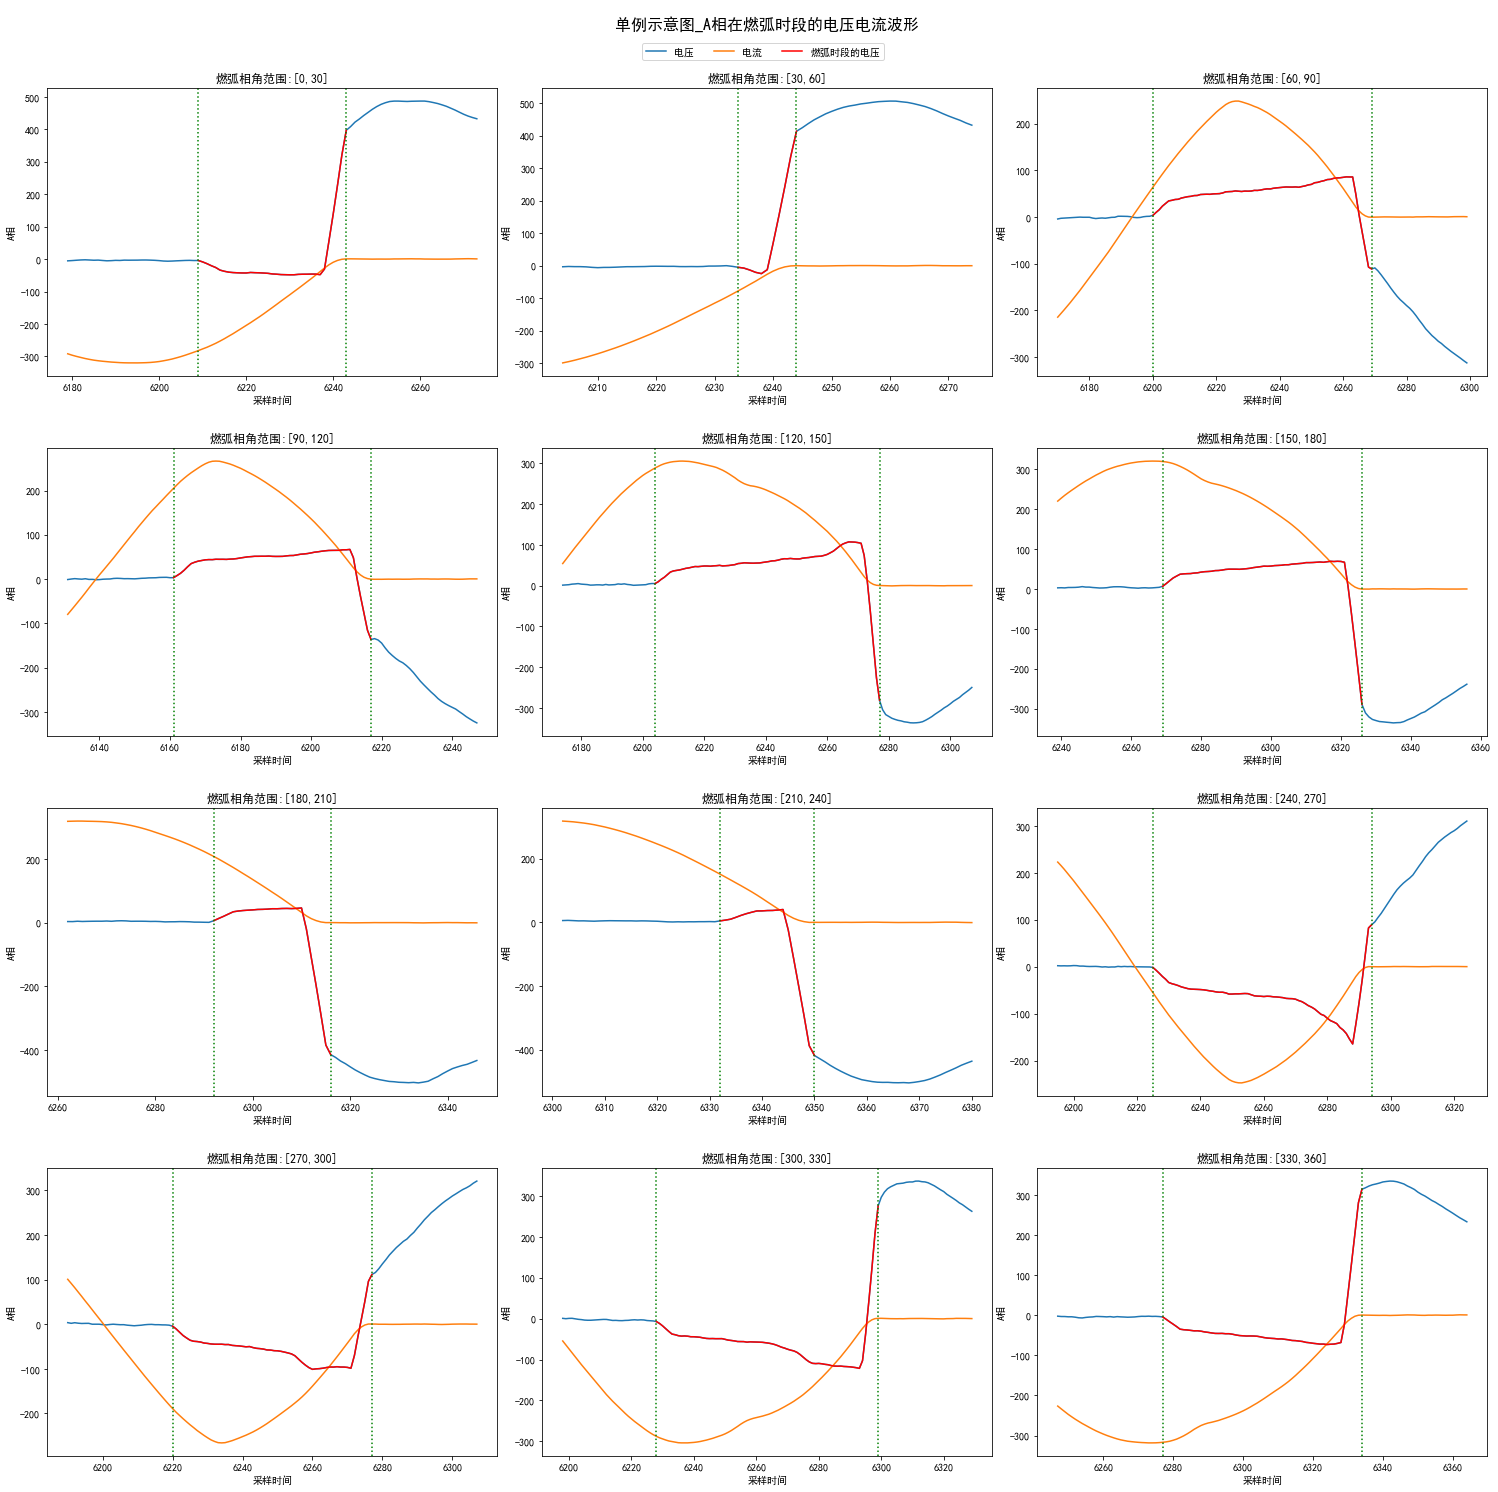

In [189]:
phase_angle_degree_gap = 30
for machine_id in machine_ids:
    machine_ftr_df = machine_ftr_dict[machine_id]
    operation_data_list = myUtils.loadPickleFile(src_data_path + machine_id + '.pkl')
    fig = plt.figure(figsize=(20,20))
    plt.subplots_adjust(top=0.95,bottom=0,left=0,right=1,hspace=0.25,wspace=0.1)
    #解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    title = '单例示意图_A相在燃弧时段的电压电流波形'
    fig.suptitle(title,fontsize=16,y=1)
    for range_idx, degree_start in enumerate(range(0, 360, phase_angle_degree_gap)):
        plt.subplot(4,3,range_idx+ 1)
        degree_end = phase_angle_degree_gap + degree_start
        tmp_df = machine_ftr_df[(machine_ftr_df['A_phase_angle_degree'] >= degree_start) & (machine_ftr_df['A_phase_angle_degree'] <= degree_end)]
       
        for idx in tmp_df.index:
            #print(idx)
            arcing_start = int(tmp_df.loc[idx]['A_arcing_start'])
            arcing_end = int(tmp_df.loc[idx]['A_arcing_end']) + 1
            enlarge_range = 30
            arcing_enlarge_range = list(range(arcing_start - enlarge_range, arcing_end + enlarge_range))
            tmp_UA = operation_data_list[idx]['UA'][arcing_enlarge_range]#.tolist()
            tmp_IA = operation_data_list[idx]['IA'][arcing_enlarge_range]#[arcing_start - enlarge_range: arcing_end + enlarge_range]#.tolist()
            plt.plot(arcing_enlarge_range, tmp_UA)#
            plt.plot(arcing_enlarge_range, tmp_IA)
            plt.plot(np.arange(arcing_start, arcing_end), operation_data_list[idx]['UA'][arcing_start: arcing_end], c = 'r')
            plt.axvline(arcing_start, c='g', ls=':')
            plt.axvline(arcing_end - 1, c='g', ls=':')
            plt.title('燃弧相角范围:[' + str(degree_start) +','+ str(degree_end)+']')
            plt.xlabel('采样时间')
            plt.ylabel('A相')
            break
    fig.legend(['电压','电流','燃弧时段的电压'], loc = 'upper center', ncol=3, bbox_to_anchor=(0.38,1.01, 0.3, 0))#,borderaxespad=1)
    fig.savefig(feature_path  + title + '.png', dpi=100, bbox_inches ='tight')
    #plt.close(fig)
    break

#### 每个设备的燃弧时长/能量与操作次数的关系

In [161]:
en_col = ['energy','duration']
cn_col = ['能量','时长']
idx_col = 0
phase_angle_degree_gap = 30
for machine_id in machine_ids:#
    machine_ftr_df = machine_ftr_dict[machine_id]
    machine_ftr_df['machine_id'] = machine_id
    machine_ftr_df['operation_times'] = machine_ftr_df.index
    
    fig = plt.figure(figsize = (30,16))
    title = '不同燃弧相角区间内，A相燃弧' + cn_col[idx_col] +'与操作次数的关系（'+ str(machine_id) +'号设备）'
    fig.suptitle(title,fontsize=16,y=1)
    #plt.subplots_adjust(hspace=0.5,wspace=0.2)
    #解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    y_max = max(machine_ftr_df['A_arcing_' + en_col[idx_col]])
    for range_idx, degree_start in enumerate(range(0, 360, phase_angle_degree_gap)):
        plt.subplot(4,3,range_idx+ 1)
        plt.tight_layout(pad=5) 
        degree_end = phase_angle_degree_gap + degree_start
        tmp_df = machine_ftr_df[(machine_ftr_df['A_phase_angle_degree'] >= degree_start) & (machine_ftr_df['A_phase_angle_degree'] <= degree_end)]
        plt.plot(tmp_df['operation_times'], tmp_df['A_arcing_' + en_col[idx_col]],'.')
        plt.title('燃弧相角范围:[' + str(degree_start) +','+ str(degree_end)+']')
        plt.xlabel('操作序号')
        plt.ylabel('燃弧'+ cn_col[idx_col])
        # plt.ylim([0,2000000])
    fig.savefig(feature_path + '燃弧相角划分_间隔'+str(phase_angle_degree_gap)+'度/燃弧'+cn_col[idx_col]+'/' + title+ '.png', dpi=100,bbox_inches ='tight')
    plt.close(fig)
    